In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
## Input data generation
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.0, 0.1], [0.1, 1.1]])

mean_02 = np.array([5.0, 6.0])
cov_02 = np.array([[1.3, 0.2], [0.2, 1.5]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape
print dist_02.shape

(500, 2)
(500, 2)


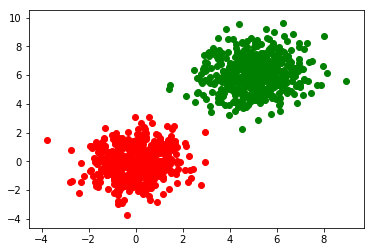

In [7]:
for ix in range(dist_01.shape[0]):
    plt.scatter(dist_01[ix, 0], dist_01[ix, 1], c='r')
    plt.scatter(dist_02[ix, 0], dist_02[ix, 1], c='g')
plt.show()

In [8]:
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print data.shape
print data.dtype

(1000, 3)
float64


In [9]:
data[:dist_01.shape[0], :-1] = dist_01
data[dist_01.shape[0]: rows, :-1] = dist_02

data[dist_01.shape[0]:rows, -1] = 1.0

In [10]:
print data.shape

(1000, 3)


In [11]:
np.random.shuffle(data)
print data[:10]

[[ 5.80081034  4.41155762  1.        ]
 [ 1.18638866 -0.24273736  0.        ]
 [-0.13256605 -1.55323811  0.        ]
 [-1.48475708 -0.74307471  0.        ]
 [-0.52234079  0.07821381  0.        ]
 [-1.14231901  0.39703527  0.        ]
 [-1.36784987  1.5608557   0.        ]
 [ 0.34501494 -1.77100928  0.        ]
 [ 0.49260181 -0.29912897  0.        ]
 [ 5.55102003  6.004711    1.        ]]


In [12]:
## Testing Training Split
split_factor = 0.85
split = int(data.shape[0]*split_factor)
train_data = data[:split]
test_data = data[split:]
print train_data.shape
print test_data.shape

X_train = train_data[:, :-1]
Y_train = train_data[:, -1]

X_test = test_data[:, :-1]
Y_test = test_data[:, -1]
print X_test.shape
print Y_test.shape

(850, 3)
(150, 3)
(150, 2)
(150,)


In [13]:
print np.unique(Y_train, return_counts=True)
print np.unique(Y_test)

(array([0., 1.]), array([425, 425]))
[0. 1.]


In [14]:
## Distance Function
def distance(p1, p2):
    '''Eucledian Distance'''
    dist = np.sqrt(((p1-p2)**2).sum())
    return dist

def distance_manhat(p1, p2):
    return np.sum(abs(p1-p2))

distance(np.array([0.0, 0.0]), np.array([1.0, 1.0]))
distance_manhat(np.array([0.0, 0.0]), np.array([1.0, 1.0]))

2.0

In [15]:
## K-Nearest Neighbors
def KNN(test_point,x_train, y_train, k=5):
    '''This function returns the predicted label for a test point'''
    d = []
    for ix in range(x_train.shape[0]):
        dist = distance(test_point, x_train[ix])
        d.append((dist, y_train[ix]))
    
    d = np.array(d)
    sorted_vals = sorted(d, key=lambda z:z[0]) ## To sort on basis of a column
    sorted_vals = np.array(sorted_vals)[:k]
    ## sorted_vals is a (k,2) matrix here
    freq = np.unique(sorted_vals[:, -1], return_counts=True)
    label = freq[0][freq[1].argmax()]
    return label

In [16]:
x = np.array([1,2,3,6,7,3,1])
print x.max()
x.argmax()

7


4

In [17]:
test_point = np.array([3.0, 2.1])
print KNN(test_point, X_train, Y_train)

0.0


In [18]:
def get_acc(X_test, Y_test, X_train, Y_train, K=5):
    '''This is homework assignment'''
    ##return accuracy
    preds = []
    for ix in range(X_test.shape[0]):
        pred = KNN(X_test[ix], X_train, Y_train)
        preds.append(pred)
    
    pred_arr = np.array(preds)
    ans = np.array(pred_arr==Y_test)
    acc = np.sum(ans)/float(X_test.shape[0])
    return acc
    #pass

In [19]:
### Evaluation on the Fashion MNIST Dataset
path = '/Users/ayush/Downloads/fashionmnist/fashion-mnist_train.csv'
ds = pd.read_csv(path)
ds.head(n=4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0


In [20]:
fashion_data = ds.values
print fashion_data.shape

limit = 4000
X = fashion_data[:limit, 1:]
Y = fashion_data[:limit, 0]
print X.shape
print Y.shape

(60000, 785)
(4000, 784)
(4000,)


In [21]:
print np.unique(Y)

[0 1 2 3 4 5 6 7 8 9]


In [22]:
split = int(X.shape[0]*0.85)
X_train = X[:split]
X_test = X[split:]

Y_train = Y[:split]
Y_test = Y[split:]

print Y_train.shape
print X_train.shape
print Y_test.dtype

(3400,)
(3400, 784)
int64


In [56]:
preds = []
for ix in range(X_test.shape[0]):
    prediction = KNN(X_test[ix], X_train, Y_train)
    preds.append(prediction)
print np.sum(np.array(preds, dtype=np.int64)==Y_test)/float(X_test.shape[0])

0.8233333333333334


In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [4]:
neigh = KNeighborsClassifier()

In [24]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
neigh.score(X_test, Y_test)

0.8233333333333334

In [28]:
neigh.fit?